In [14]:
import time_series_helper
import numpy as np
from sklearn.model_selection import train_test_split

X, y, num_features = time_series_helper.make_data_for_model()

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [9]:
from tcn import TCN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

myTCN = Sequential([
    TCN(input_shape=(14, num_features)),
    Dense(1)
])

myTCN.compile(optimizer='adam', loss='mse')
myTCN.summary()

history = myTCN.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

/Users/buekarlc/miniconda3/envs/ml/lib/python3.12/site-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tcn_1 (TCN)                     │ (None, 64)             │       142,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,209 (555.50 KB)

 Trainable params: 142,209 (555.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 3.8290 - val_loss: 2.4516
Epoch 2/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 1.8120 - val_loss: 1.8582
Epoch 3/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 1.6300 - val_loss: 2.3049
Epoch 4/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 1.5778 - val_loss: 1.8757
Epoch 5/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1.4443 - val_loss: 2.0392
Epoch 6/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 1.3697 - val_loss: 1.9477
Epoch 7/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 1.2632 - val_loss: 2.0537
Epoch 8/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 1.1375 - val_loss: 2.1282
Epoch 9/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.9389 - val_loss: 2.3453
Epoch 10/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.8427 - val_loss: 2.2851
Epoch 11/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.7127 - val_loss: 2.6052
Epoch 12/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 

In [10]:
y_pred = myTCN.predict(X_test)

112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE: " + str(mse))
print("RMSE: " + str(np.sqrt(mse)))
print("MAE: " + str(mae))

MSE: 2.9858243465423584
RMSE: 1.7279538033588624
MAE: 1.3358393907546997


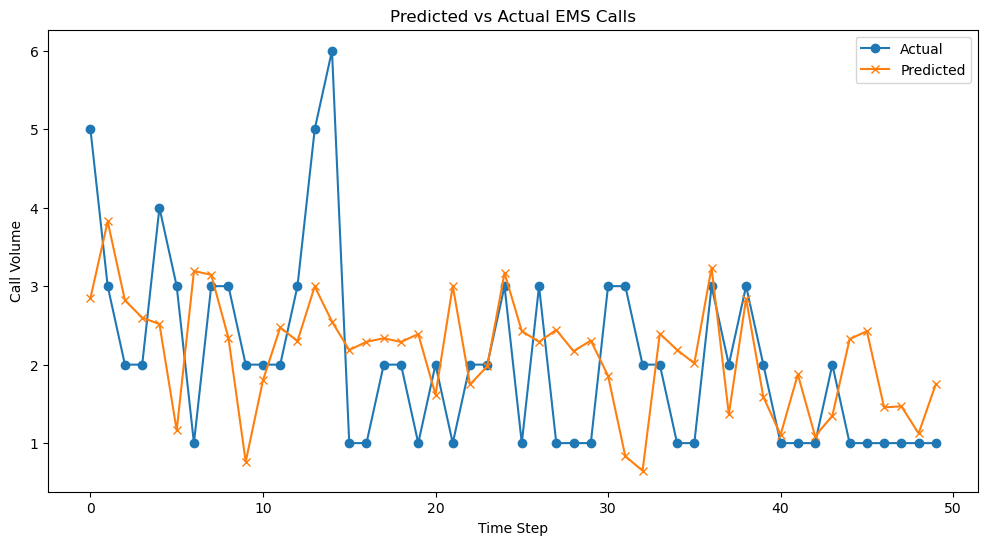

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.legend()
plt.title('Predicted vs Actual EMS Calls')
plt.xlabel('Time Step')
plt.ylabel('Call Volume')
plt.show()